In [1]:
#Importing the Analytical libraries libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the Comma Seperated data
data = pd.read_csv("Training_Dataset.csv", low_memory = False)

# Exploring the Dataset

In [4]:
data.head().transpose()

,0,1,2,3,4
sku,1026827,1043384,1043696,1043852,1044048
national_inv,0,2,2,7,8
lead_time,NaN,9,NaN,8,NaN
in_transit_qty,0,0,0,0,0
forecast_3_month,0,0,0,0,0
forecast_6_month,0,0,0,0,0
forecast_9_month,0,0,0,0,0
sales_1_month,0,0,0,0,0
sales_3_month,0,0,0,0,0
sales_6_month,0,0,0,0,0


In [5]:
data.tail().transpose()

,1687856,1687857,1687858,1687859,1687860
sku,1373987,1524346,1439563,1502009,(1687860 rows)
national_inv,-1,-1,62,19,NaN
lead_time,NaN,9,9,4,NaN
in_transit_qty,0,0,16,0,NaN
forecast_3_month,5,7,39,0,NaN
forecast_6_month,7,9,87,0,NaN
forecast_9_month,9,11,126,0,NaN
sales_1_month,1,0,35,2,NaN
sales_3_month,3,8,63,7,NaN
sales_6_month,3,11,153,12,NaN


In [6]:
# Summarise the numerical data
data.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [7]:
# Summarise the non-numerical data
data.describe(include=['O'])

,sku,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1687861,1687860,1687860,1687860,1687860,1687860,1687860,1687860
unique,1687861,2,2,2,2,2,2,2
top,3097003,No,No,No,No,Yes,No,No
freq,1,1686953,1300377,1687615,1484026,1626774,1687129,1676567


# Exploratory Data Analysis(EDA)

In [8]:
#The sku has a unique value for each row, so it is the index column and should be dropped.
data = data.drop('sku', axis=1)
#data.head()

In [9]:
#The last row of the training dataset is not a valid sample and should be removed.
data = data[0:-1]
#data.tail()

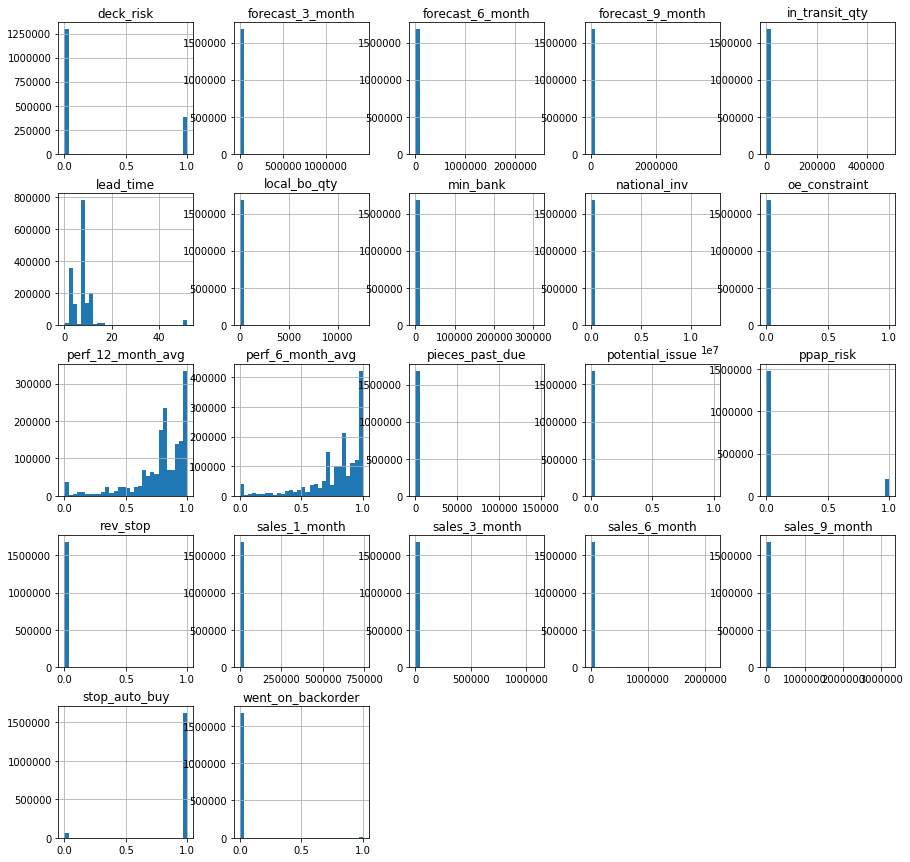

In [34]:
data.hist(bins=30,figsize=(15,15))
plt.show()

In [10]:
#the numerical features have different scales, which may be a problem for some machine learning algorithms. 
#The features should be rescaled to have similar scale.
categorical_feature = ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk','stop_auto_buy', 'rev_stop', 'went_on_backorder']
for col_name in categorical_feature:
    data[col_name] = data[col_name].map({'No':0,'Yes':1})
#data.head()

In [11]:
#perf_6_month_avg and perf_12_month_avg columns have -99 value which seems missing value,so convert it to NaN.
data['perf_6_month_avg'] = data['perf_6_month_avg'].replace(-99,np.NaN)
data['perf_12_month_avg'] = data['perf_12_month_avg'].replace(-99,np.NaN)
#data.head()

In [12]:
#Missing Values
#perf_6_month_avg has (1687860 - 1558382 = 129,478) (7.67%) missing values
#perf_12_month_avg has (1687860 - 1565810 = 122,050) (7.23%) missing values
#lead_time has (1687860 - 1586967 = 100,893) (5.98%) missing values

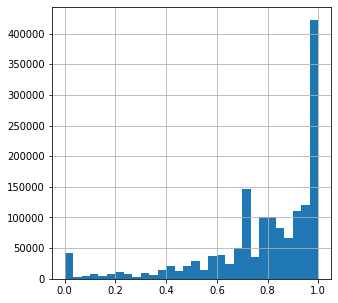

In [15]:
#ploting the histogram for perf_6_month_avg
data.perf_6_month_avg.hist(bins=30, figsize=(5,5))

The distribution of performance values is left skewed. Most values fall in the range 0.7-1. It should be OK to assume that samples with missing performance values will have values close to the median value.

In [72]:
#from scipy import stats
#print(data.perf_6_month_avg.mean())
#print(data.perf_6_month_avg.median())
#print(stats.mode(data.perf_6_month_avg))

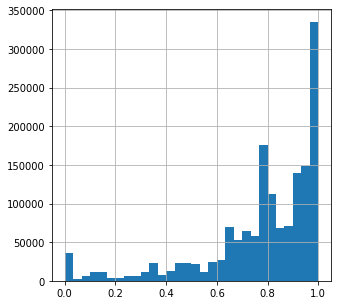

In [16]:
#ploting the histogram for perf_12_month_avg
data.perf_12_month_avg.hist(bins=30, figsize=(5,5))

This is similar to the histogram for perf_6_month_avg. The distribution of performance values is left skewed. Most values fall in the range 0.7-1. The same assumption should be OK.

In [17]:
#from scipy import stats
#print(data.perf_12_month_avg.mean())
#print(data.perf_12_month_avg.median())
#print(stats.mode(data.perf_12_month_avg))

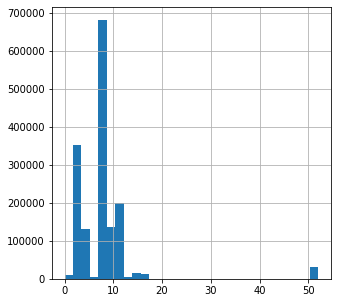

In [18]:
#Ploting Hitogram for lead_time
data.lead_time.hist(bins=30, figsize=(5,5))

The distribution of lead times is right skewed. Most lead times fall in the range 0-20. It should be OK to assume that samples with missing lead times will have lead times close to the median lead time.

In [19]:
#from scipy import stats
#print(data.lead_time.mean())
#print(data.lead_time.median())
#print(stats.mode(data.lead_time))

In [20]:
# Replace NaNs in the dataset

#perf_6_month_avg
data.perf_6_month_avg = data.perf_6_month_avg.fillna(data.perf_6_month_avg.median())

#perf_12_month_avg
data.perf_12_month_avg = data.perf_12_month_avg.fillna(data.perf_12_month_avg.median())

#lead_time
data.lead_time = data.lead_time.fillna(data.lead_time.median())
#data.info()

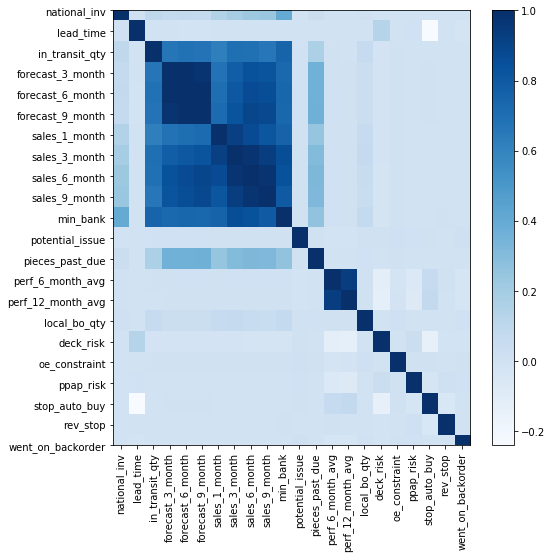

In [21]:
#Look at correlations between features and the label

# Set figure size 
fig = plt.figure(figsize=(8,8)) 

# Plot a correlation matrix
plt.imshow(data.corr(), cmap=plt.cm.Blues, interpolation='nearest', aspect='auto')

# Display legend showing what the colours mean
plt.colorbar()

# Add tick marks and feature names for ease of reading
tick_marks = [i for i in range(len(data.columns))]
plt.xticks(tick_marks, data.columns, rotation='vertical')
plt.yticks(tick_marks, data.columns)

# Show the plot
plt.show()


The correlation matrix shows that the quantity in transit, the forecast sales over 3/6/9 months, the actual sales over the previous 1/3/6/9 months, and minimum recommended stock level are highly correlated. This is not surprising because if an item had high real sales over the last 1/3/6/9 months, then it is reasonable for the forecast sales over the next 3/6/9 months to also be high. If forecast sales are high, then it would be useful to have more of the stock in hand and to have more shipped in.

Besides that, the average performance over the last 6 months strongly correlates with that over the last 12 months.

Overall, the correlation matrix suggests that the number of features used for predicting whether an item goes on back order can be lower than the number of features in the dataset. In other words, the dimensionality of the problem may be reduced.

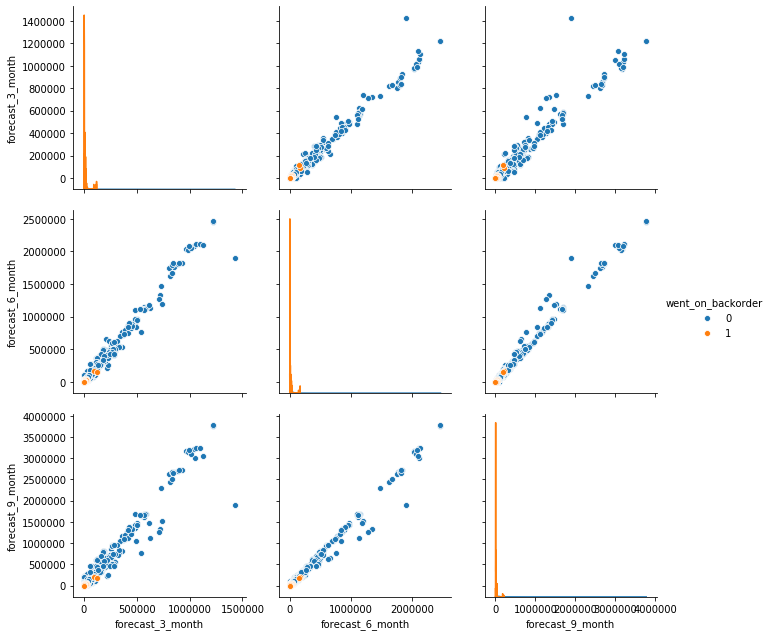

In [35]:
# Take a closer look at correlations with scatter plots.

# Forecast columns
forecasts = ['forecast_3_month','forecast_6_month', 'forecast_9_month']

# Pair-wise scatter plot for the forecasts
sns.pairplot(data, vars=forecasts, hue='went_on_backorder', height=3)

The forecast values over each time frame have very close linear correlation with each other, as expected from the correlation matrix. The forecast values cover a wide range from 0 to over 1 million. Backorders only occur when the forecast value is low.

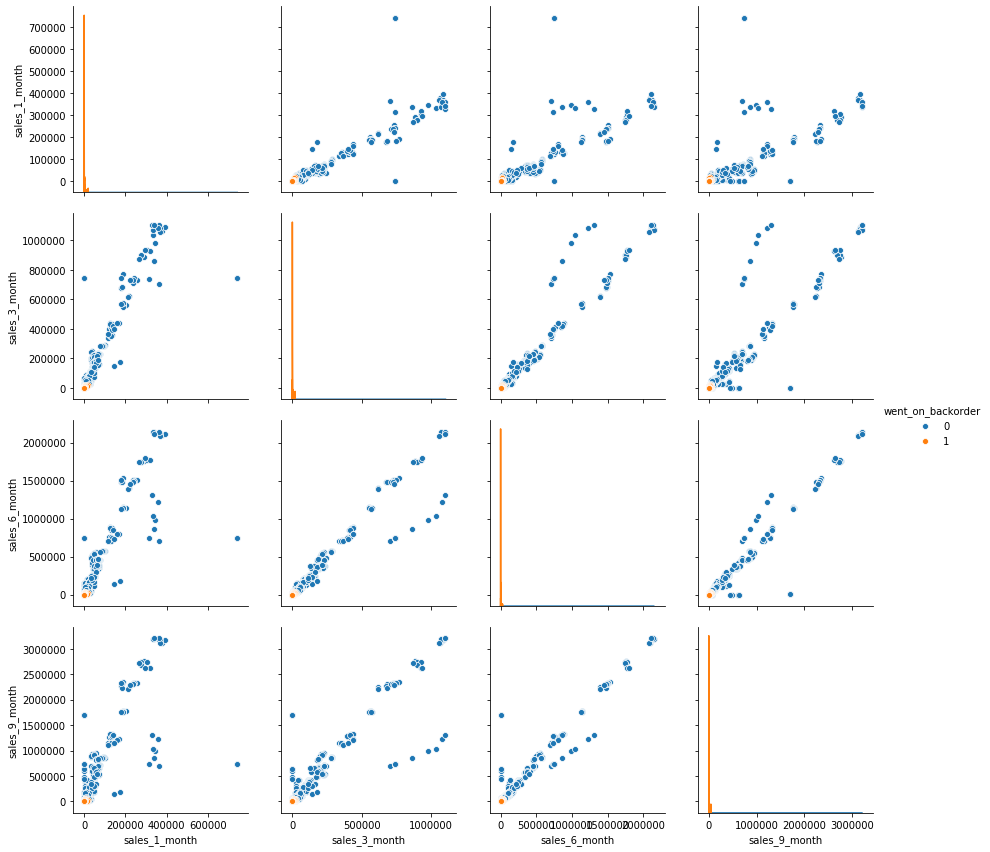

In [91]:
# Do a pair-wise scatter plot for sales
sales = ['sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month']
sns.pairplot(data, vars=sales, hue='went_on_backorder', size=3)

The sales over each time frame have good linear correlations with each other, as expected from the correlation matrix. There are some instances when the sales at different time frames fall away from the linear correlation. The sales range from 0 to over 1 million. Backorders only occur when sales are low.



In [29]:
# Do some data separation for more plots

# Separate data by going on backorder or not
no_bo = data.loc[data['went_on_backorder'] == 0]       
is_bo = data.loc[data['went_on_backorder'] == 1]

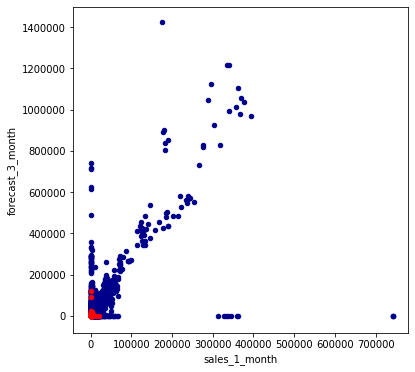

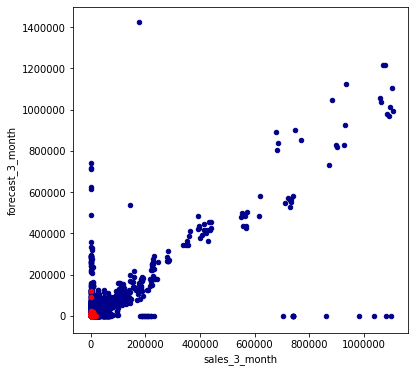

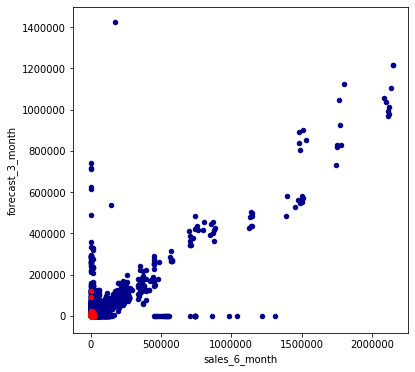

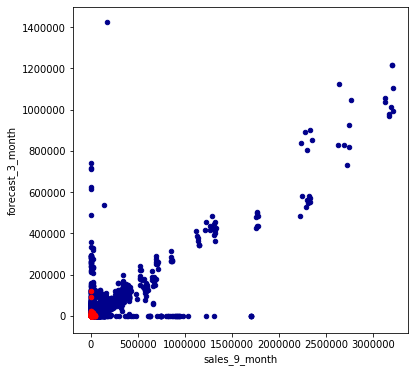

In [30]:
# Make scatter plots of the 3-month forecast against each of the sales
sales = ['sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month']
for col in sales:
    fig = plt.figure(figsize=(6, 6))
    ax = fig.gca()
    no_bo.plot(kind='scatter', x=col, y='forecast_3_month', ax=ax, color='DarkBlue', legend=True)
    is_bo.plot(kind='scatter', x=col, y='forecast_3_month', ax=ax, color='Red')

There is a good linear relationship between sales and forecasts, as expected from the correlation matrix. Backorder happens when sales and forecasts are low.

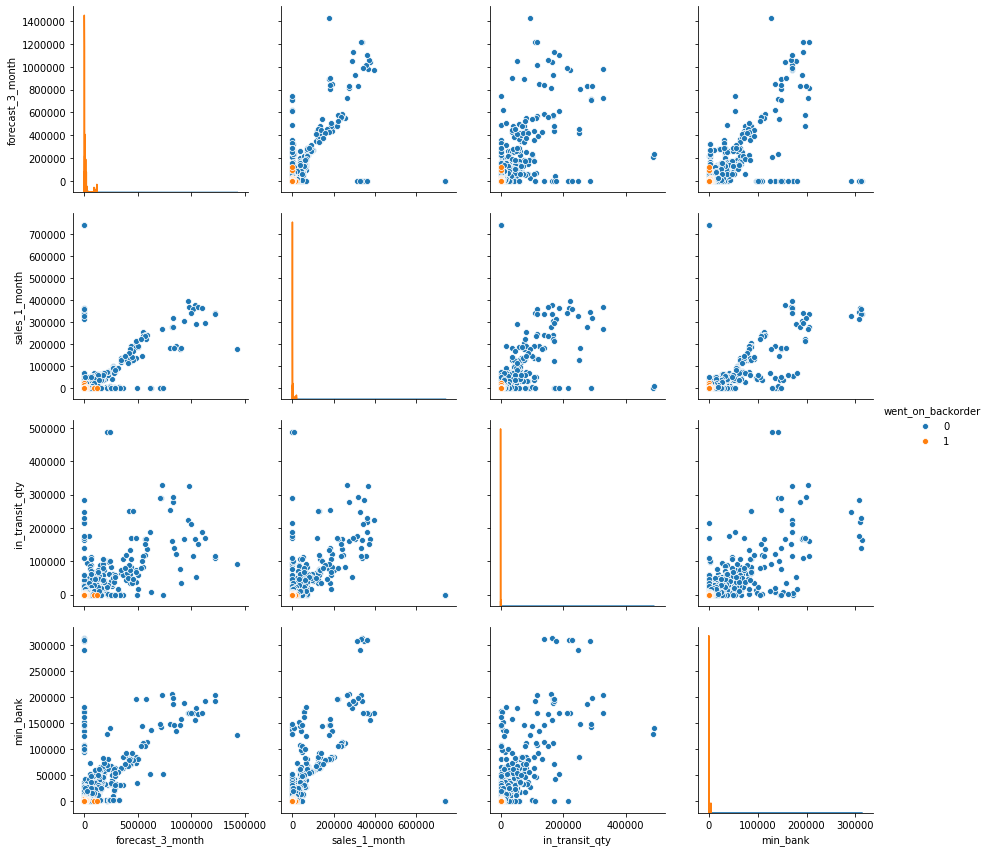

In [97]:
#Look at forecast, sales, in transit and recommended stock level in a pair-wise scatter plot
feature_set_1 = ['forecast_3_month', 'sales_1_month', 'in_transit_qty', 'min_bank']
sns.pairplot(data, vars=feature_set_1, hue='went_on_backorder', size=3)

The scatter plots show okay linear relationships between forecast, sales, in transit and recommended stock level.

Due to the good correlations and sufficiently linear relationships between these features, they will all be represented by a single feature in the machine learning models. The feature chosen is sales_1_month. This is because past sales is measured, whereas the quantity in transit, recommended minimum stock and forecasts are likely derived from past sales.

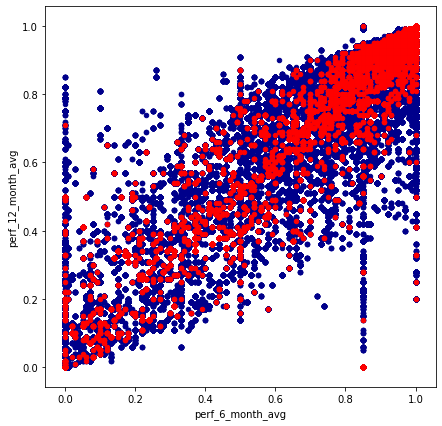

In [98]:
# Look at the two performance columns
fig = plt.figure(figsize=(7, 7))
ax = fig.gca()
no_bo.plot(kind='scatter', x='perf_6_month_avg', y='perf_12_month_avg', ax=ax, color='DarkBlue')
is_bo.plot(kind='scatter', x='perf_6_month_avg', y='perf_12_month_avg', ax=ax, color='Red')

There is a linear relationship between perf_6_month_avg and perf_12_month_avg. As such, only one of the two features is enough for use in a machine learning model. Backorders occur for all performance values.

# Machine Learning Model

In [31]:
#%% Machine learning models

# Filter out the data that will be used

# Features chosen
features = ['national_inv', 'lead_time', 'sales_1_month', 'pieces_past_due', 'perf_6_month_avg',
            'local_bo_qty', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop']

reduced_train_data = data[features]

test_data = pd.read_csv(r"Test_Dataset.csv") #This Data is Already Prepare.


reduced_test_data = test_data[features]

# Set labels
train_label = data['went_on_backorder']
test_label = test_data['went_on_backorder']

In [32]:
# KNN
from sklearn.neighbors import KNeighborsClassifier   # K-Nearest Neighbours Classifier model
model = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# Training , Predicting and Evaluating

In [14]:
model.fit(reduced_train_data, train_label) #Training Model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [27]:
y_test = model.predict(reduced_test_data) #Prediction
print(y_test)

[0 0 0 ... 0 0 0]


In [22]:
score = model.score(reduced_test_data, test_label) #Evaluation
print('KNN model score is', score)

KNN model score is 0.9888877414024579
